# Cài đặt
Import các thư viện liên quan chuẩn bị cho qua trình Thống kê Mô tả.
## Import thư viện

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Đọc dữ liệu

In [ ]:
df = pd.read_csv("winequality-red.csv")

## Hiểu dữ liệu


## Thông tin ban đầu về tập dữ liệu

### Thông tin cơ bản

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
# Số hàng, số cột của dataset
print("(Số dòng, số cột) = " , str(df.shape))
# Hiển thị 5 hàng đầu tiên của dataset
df.head()

(Số dòng, số cột) =  (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Tổng cộng dataset có 1599 hàng và 12 cột. Nhìn có vẻ không có vấn đề nhưng cần kiểm tra thêm để chắc chắn không có hàng nào có giá trị bị thiếu.

## Thống kê mô tả của các biến số

In [34]:
df.describe().T.style.background_gradient(cmap = "magma")


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


In [36]:
# Thông qua thống kê
data = {
    "Biến": [
        "Fixed acidity (axit cố định)", "Volatile acidity (axit bay hơi)",
        "Citric acid (axit citric)", "Residual sugar (đường dư)",
        "Chlorides (clorua)", "Free sulfur dioxide (SO₂ tự do)",
        "Total sulfur dioxide (SO₂ tổng)", "Density (khối lượng riêng)",
        "pH", "Sulphates (sunfat)", "Alcohol (ancol)", "Quality (chất lượng)"
    ],
    "Giá trị trung bình": [8.31, 0.52, 0.27, 2.53, 0.08, 15.87, 46.46, 0.99, 3.31, 0.65, 10.42, 5.63],
    "Giá trị cao nhất": [15.9, 1.58, 1.0, 15.5, 0.61, 72, 289, 1.0, 4.01, 2.0, 14.90, 8]
}

df_stats = pd.DataFrame(data)
df_stats

,Biến,Giá trị trung bình,Giá trị cao nhất
0,Fixed acidity (axit cố định),8.31,15.90
1,Volatile acidity (axit bay hơi),0.52,1.58
2,Citric acid (axit citric),0.27,1.00
3,Residual sugar (đường dư),2.53,15.50
4,Chlorides (clorua),0.08,0.61
5,Free sulfur dioxide (SO₂ tự do),15.87,72.00
6,Total sulfur dioxide (SO₂ tổng),46.46,289.00
7,Density (khối lượng riêng),0.99,1.00
8,pH,3.31,4.01
9,Sulphates (sunfat),0.65,2.00


## Giá trị bị thiếu

In [11]:
# Hiển thị giá trị bị thiếu cho từng cột
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Dataset hiện tại khá thân thiện, không có cột nào bị thiếu giá trị. Vì thế không cần xử lý thêm các bước để xử lý mà có thể tiến hành vào phân tích, thống kê ngay.

## Trực quan hóa

### Biểu đồ của biến "quality"


In [24]:
fig = px.histogram(df,x='quality', 
                   labels={'quality': 'Chất lượng rượu', 'count': 'Số lượng'},
                   title="Biểu đồ phân phối chất lượng rượu")
fig.update_yaxes(title="Số lượng")
fig.update_traces(
    hovertemplate="Chất lượng rượu = %{x}<br>Số lượng = %{y}"
)
fig.show()

### Pie Chart

In [ ]:
# Đếm số lượng từng mức quality
quality_counts = df['quality'].value_counts().reset_index()
quality_counts.columns = ['quality', 'count']

# Vẽ pie chart
fig = px.pie(
    quality_counts, 
    values='count', 
    names='quality',
    title="Biểu đồ tròn phân bố chất lượng rượu",
    hole=0.0  # =0 là pie chart thường, >0 là donut chart
)

# Chỉnh font chữ to hơn
fig.update_traces(textfont_size=16)

fig.show()

➤ Ta có thể thấy mức phân bố chủ yếu của chất lượng rượu đa số ở mức 5,6. Mức 7 cũng phân bố trung bình - thấp hơn 2 mức kia, các mức còn lại rất thấp.

### Heatmap

<Axes: >

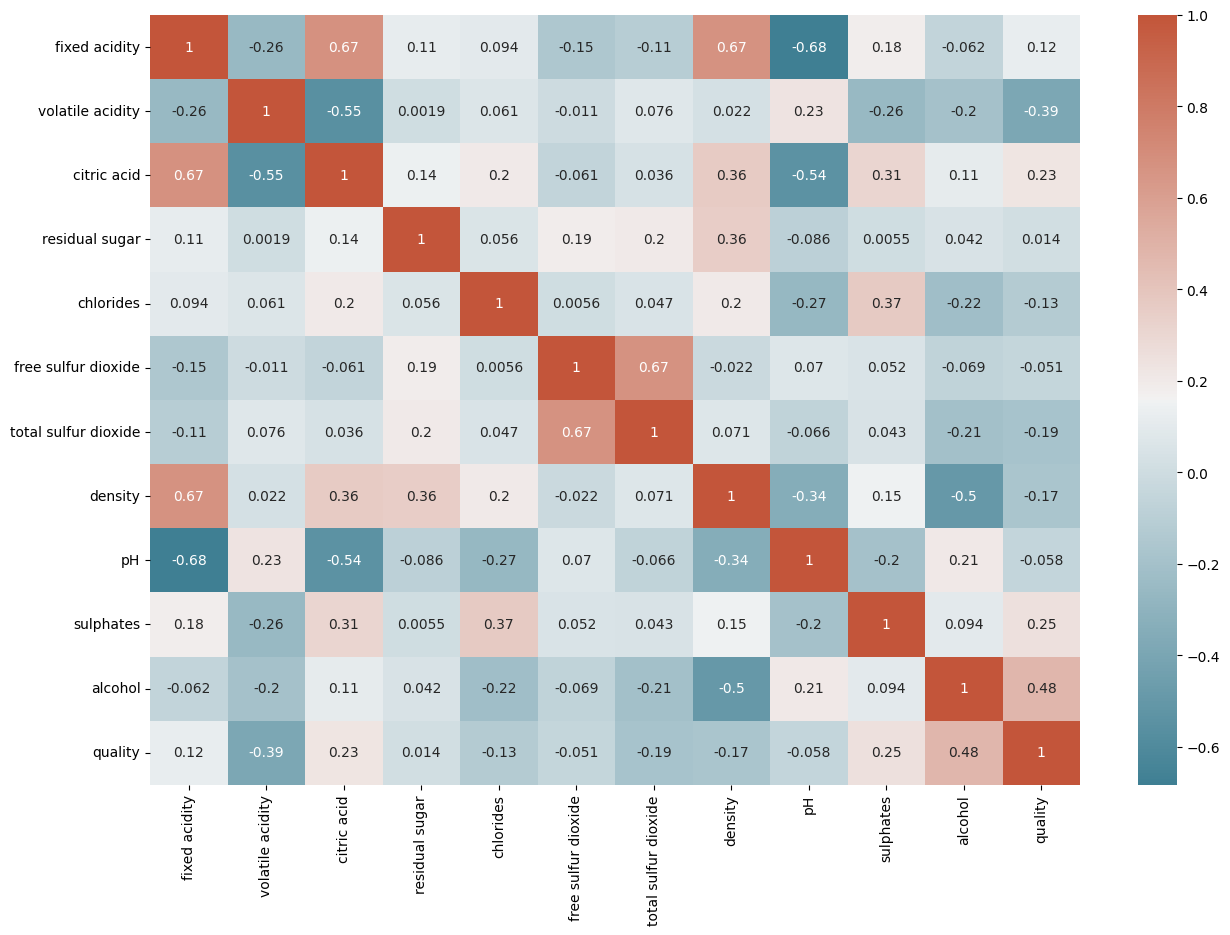

In [20]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


\- Thông qua ma trận ta thấy có một vài biến có tương quan với biến 'quality', cụ thể như sau:

\+ 'alcohol' : có mức tương quan dương khá lớn (0.48).

\+ 'volatile acidity' : có mức tương quan âm trung bình (-0.39).

\+ 'sulphates' : tương quan dương yếu - trung bình (0.25).

\+ 'citric acid' : tương quan dương yếu.

➤ Nhận xét: Nồng độ cồn (alcohol) có ảnh hưởng lớn đến chất lượng, nồng độ cao sẽ có chất lượng tốt hơn. Bên cạnh đó, độ axit dễ bay hơi (volatile acidity) cao sẽ làm cho chất lượng giảm. Ngoài ra có thể tăng một ít sunfat (sulphates) và axit xitric (citric acid) để tăng chất lượng rượu.

### Boxplot

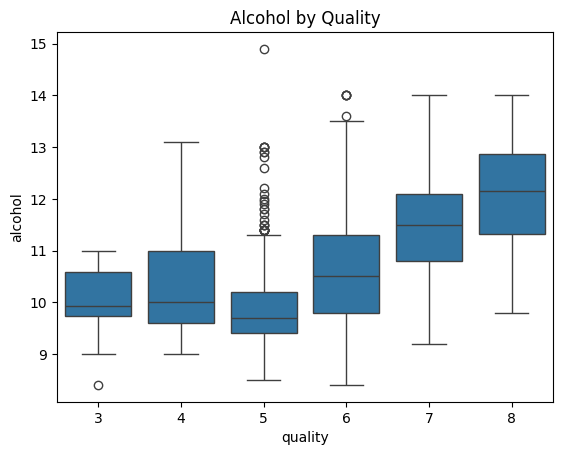

In [30]:
sns.boxplot(data=df, x='quality', y='alcohol')
plt.title('Alcohol by Quality')
plt.show()

Mô tả: 
- Với quality = 3: Trung vị ở mức khoảng 10.0. Phần lớn rượu có chất lượng thấp chứa lượng cồn thấp (9–11), có một vài ngoại lai dưới 9.

- Với quality = 5 (chất lượng phổ biến nhất trong dataset): Trung vị ở mức khoảng 10.0, thấp hơn so với chất lượng cao hơn. Có rất nhiều outliers với alcohol > 11, nghĩa là một số rượu có cồn cao nhưng chất lượng vẫn chỉ đạt mức 5.

- Với quality = 6: Trung vị ở mức khoảng 11.0. Độ phân tán lớn hơn, nhiều rượu có cồn cao hơn.

- Với quality = 7 và 8: Trung vị tăng rõ rệt (~11.5–12.5). Hộp dịch lên → rượu chất lượng cao thường có cồn cao hơn và ít outliers hơn

# Tổng kết

Mức phân bố chủ yếu của biến chất lượng 'quality' tập trung ở khoảng giá trị 5,6.

Nồng độ cồn (alcohol) có ảnh hưởng lớn đến chất lượng rượu, độ axit dễ bay hơi ảnh hưởng trung bình, sunfat và axit xitrit có ảnh hưởng thấp, các biến còn lại rất kém, không đáng kể.

